# Handwritten Digit Recognition - Digits Dataset
## Multi-layer Perceptron

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.svm import SVC
from sklearn.preprocessing import scale, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, classification_report

from sklearn.neural_network import MLPClassifier, MLPRegressor

Matplotlib is building the font cache; this may take a moment.


### Loading Dataset and Describing it

In [2]:
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## Displaying Input Images

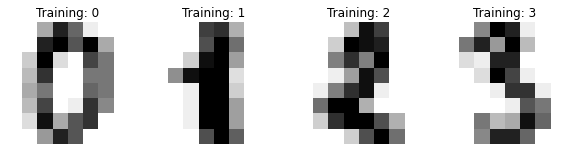

In [3]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Preprocessing

In [4]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data.shape

(1797, 64)

### Distribution of Data among classes

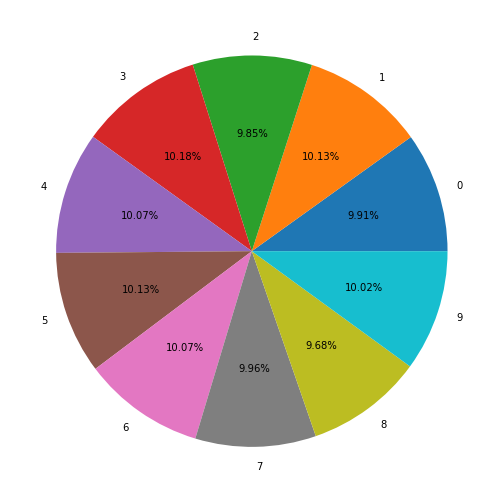

In [5]:
df_digits = pd.DataFrame(data, columns=digits.feature_names)
df_digits['target'] = digits.target

classes = df_digits.groupby('target')['target'].count()

plt.figure(figsize=(9, 9))
plt.pie(classes, labels=digits.target_names, autopct='%.2f%%')
plt.show()

### Standarding the data

In [6]:
std_digits = scale(data)

### Training and Testing Set Split

In [7]:
train_x, test_x, train_y, test_y = train_test_split(std_digits, df_digits['target'], test_size=0.1)

## Multilayer Perceptron

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', max_iter=2000) # Model Creation
mlp.fit(train_x, train_y) # Model Training
mlp_y = mlp.predict(test_x) # Model Testing

### Confusion Matrix

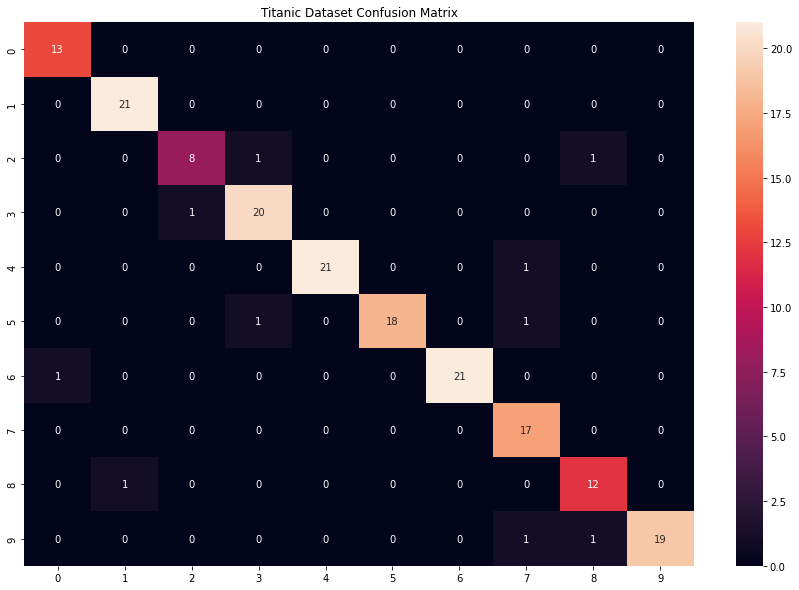

In [9]:
mlp_cmat = confusion_matrix(test_y, mlp_y)

fig = plt.figure(figsize=(15, 10))
plt.title('Titanic Dataset Confusion Matrix')
sns.heatmap(mlp_cmat, annot=True)
plt.show()

### Metrics for training data

In [10]:
mlp_ip_y = mlp.predict(train_x)
print('For Training Data : \n', classification_report(train_y, mlp_ip_y))

For Training Data : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       161
           2       1.00      1.00      1.00       167
           3       1.00      1.00      1.00       162
           4       1.00      1.00      1.00       159
           5       1.00      1.00      1.00       162
           6       1.00      1.00      1.00       159
           7       1.00      1.00      1.00       162
           8       1.00      1.00      1.00       161
           9       1.00      1.00      1.00       159

    accuracy                           1.00      1617
   macro avg       1.00      1.00      1.00      1617
weighted avg       1.00      1.00      1.00      1617



### Metrics for Testing Data

In [11]:
print('For Testing Data : \n', classification_report(test_y, mlp_y))

For Testing Data : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.95      1.00      0.98        21
           2       0.89      0.80      0.84        10
           3       0.91      0.95      0.93        21
           4       1.00      0.95      0.98        22
           5       1.00      0.90      0.95        20
           6       1.00      0.95      0.98        22
           7       0.85      1.00      0.92        17
           8       0.86      0.92      0.89        13
           9       1.00      0.90      0.95        21

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.95      0.94      0.94       180

